# <font color='green'>Wind Turbine Power Production </font> 


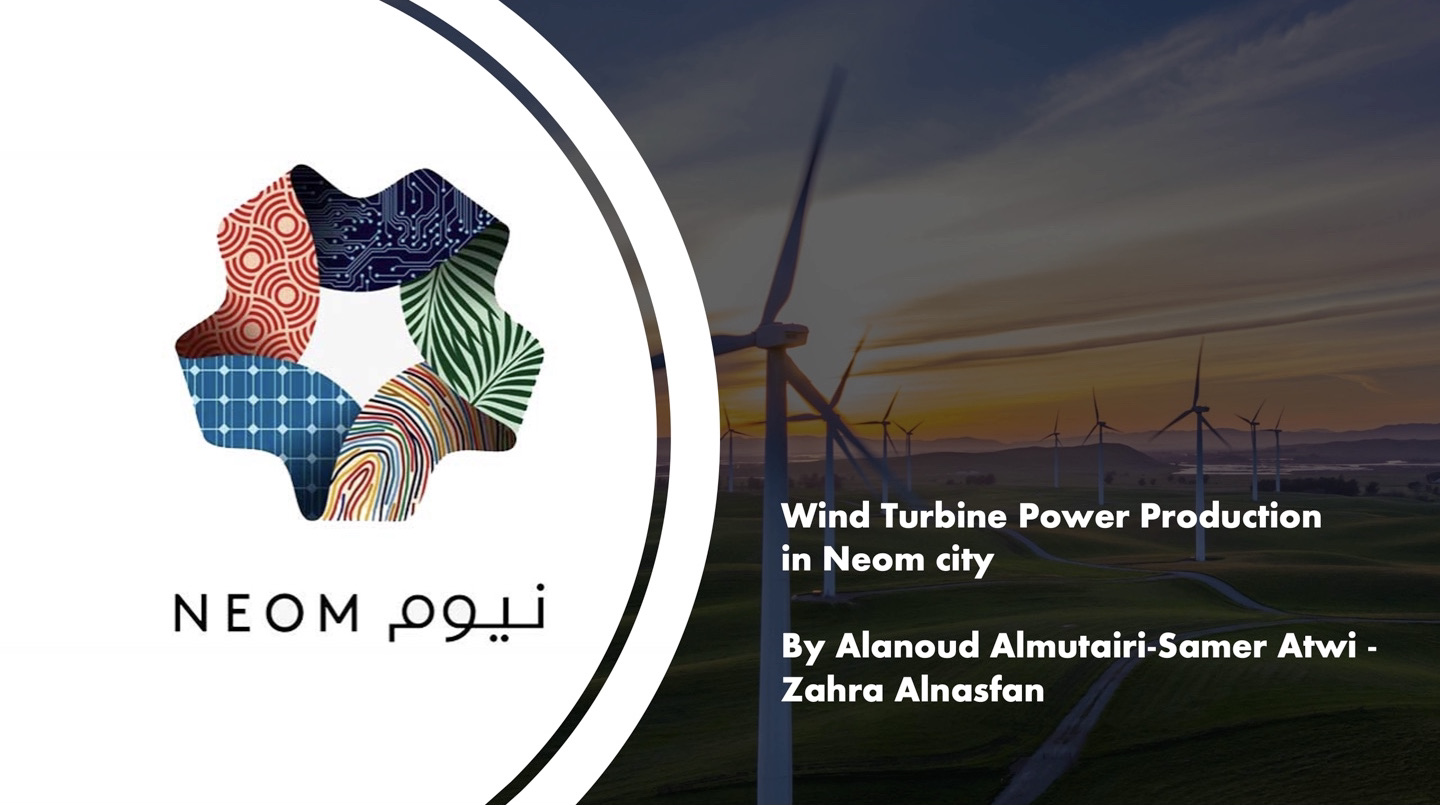

In [24]:
from IPython.display import Image
Image(filename='Image Wind Turbine Power1 Production in Neom city.jpg') 

# Importing Basic Libraries

In [3]:
import time
import datetime
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime


<ipython-input-3-9edd3d097237>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


# Reading the dataset¶

In [4]:
data = pd.read_csv('Turbine_Data_.csv')
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


# Description

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [6]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


# Data cleaning

In [7]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

# Data processing

In [8]:
data['Year'] = data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[0])
data['Month'] = data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[1])
data['Day'] = data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[2])
data['Time_Hours'] = data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[3])
data['Time_Minutes'] = data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])

data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
...,...,...,...,...,...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724,2018,12,31,23,10
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599,2018,12,31,23,20
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500,2018,12,31,23,30
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913,2018,12,31,23,40


In [9]:
data = data.dropna()

In [10]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,2018,12,31,23,10
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,2018,12,31,23,20
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,2018,12,31,23,30
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,2018,12,31,23,40


# Visualization

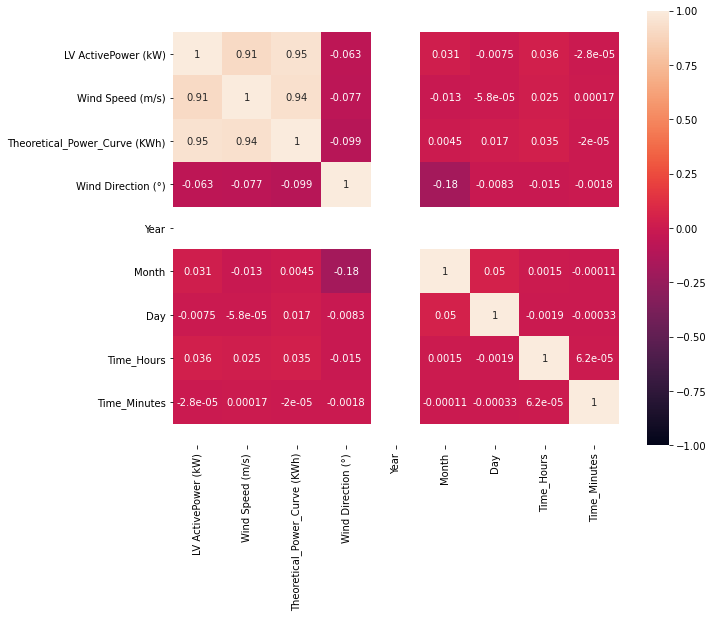

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702,NaN,0.031010,-0.007530,0.036355,-0.000028
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188,NaN,-0.013349,-0.000058,0.024754,0.000166
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076,NaN,0.004455,0.017096,0.034636,-0.000020
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000,NaN,-0.180712,-0.008287,-0.015355,-0.001821
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.031010,-0.013349,0.004455,-0.180712,NaN,1.000000,0.049584,0.001510,-0.000114
Day,-0.007530,-0.000058,0.017096,-0.008287,NaN,0.049584,1.000000,-0.001882,-0.000331
Time_Hours,0.036355,0.024754,0.034636,-0.015355,NaN,0.001510,-0.001882,1.000000,0.000062
Time_Minutes,-0.000028,0.000166,-0.000020,-0.001821,NaN,-0.000114,-0.000331,0.000062,1.000000


In [11]:
#correlation between the values
corr = data.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

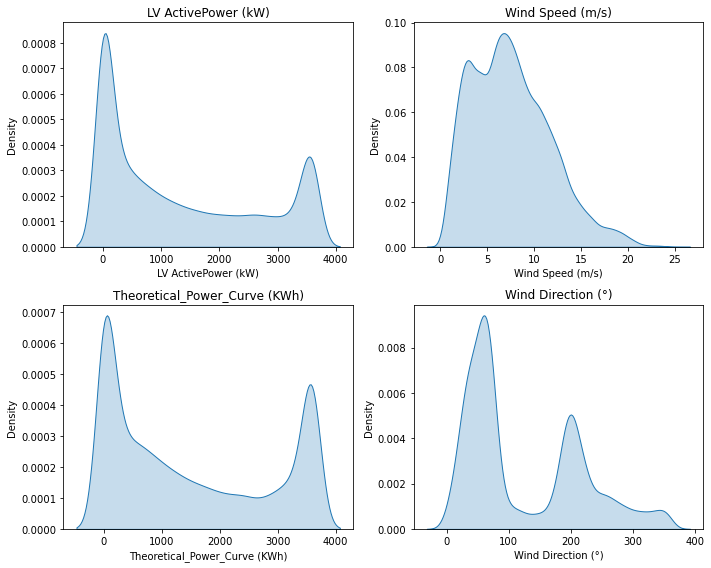

In [12]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data.iloc[:,i+1], shade=True)
    plt.title(data.columns[i+1])
plt.tight_layout()
plt.show()

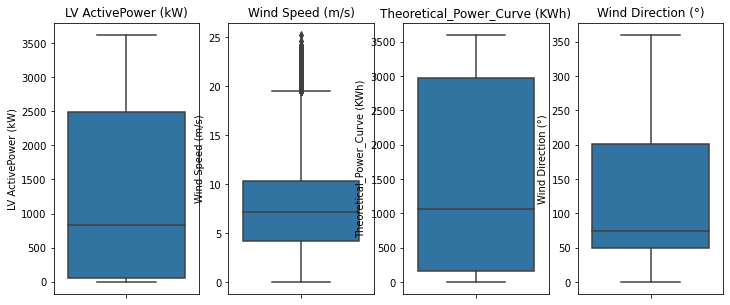

In [13]:
import matplotlib.pyplot as plt
columns = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']
i=1
plt.figure(figsize=(12,5))
for each in columns:
    plt.subplot(1,4,i)
    sns.boxplot(data = data, y= each)
    plt.title(each)
    i += 1

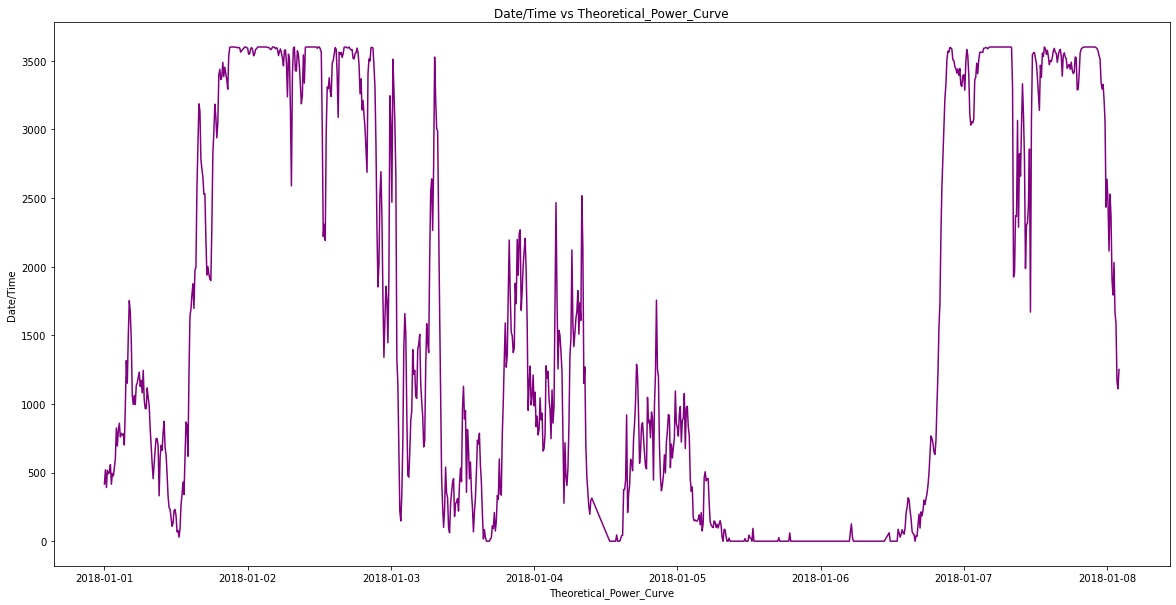

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['Date/Time'][0:1000], data['Theoretical_Power_Curve (KWh)'][0:1000], color='purple')
ax.set(xlabel="Theoretical_Power_Curve", ylabel="Date/Time", title="Date/Time vs Theoretical_Power_Curve")
plt.show()

In [15]:
data['LV ActivePower (kW)']

0         380.047791
1         453.769196
2         306.376587
3         419.645905
4         380.650696
            ...     
50525    2963.980957
50526    1684.353027
50527    2201.106934
50528    2515.694092
50529    2820.466064
Name: LV ActivePower (kW), Length: 50530, dtype: float64

In [16]:
data = data.drop(['Wind Direction (°)', 'Year', 'Month', 'Day', 'Time_Hours', 'Time_Minutes'], axis=1)
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972


# Modleing & Test

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [18]:
data = data.set_index('Date/Time')

In [19]:
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [20]:
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [21]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [22]:
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [83]:
def scale(train, test):

    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)

    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)

    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [84]:
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [85]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)

In [86]:
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]


In [87]:
for i in range(0,10):
  data = data[:-1]
data.tail()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-12-31 18:10:00,233.953613
2018-12-31 18:20:00,287.885241
2018-12-31 18:30:00,287.241996
2018-12-31 18:40:00,302.480001
2018-12-31 18:50:00,334.719439


In [88]:
raw_values = data.values
diff_values = difference(raw_values, 1)

In [89]:
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [79]:
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [80]:
scaler, train_scaled, test_scaled = scale(train, test)

In [33]:
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

49519/49519 [==============================] - 78s 2ms/step - loss: 0.0055


In [41]:
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()

for i in range(len(test_scaled)):
    
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    yhat = invert_scale(scaler, X, yhat)
    
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Hour=1, Predicted=3608.825532, Expected=3600.000000
Hour=2, Predicted=3609.533312, Expected=3600.000000
Hour=3, Predicted=3609.002563, Expected=3600.000000
Hour=4, Predicted=3608.645367, Expected=2506.112948
Hour=5, Predicted=2514.675329, Expected=1954.282949
Hour=6, Predicted=1962.440811, Expected=1128.684225
Hour=7, Predicted=1136.534089, Expected=2087.002742
Hour=8, Predicted=2094.671402, Expected=1497.144149
Hour=9, Predicted=1504.569473, Expected=3143.880909
Hour=10, Predicted=3151.032343, Expected=3257.240200
Hour=11, Predicted=3264.441069, Expected=3099.589351
Hour=12, Predicted=3106.854800, Expected=2288.732261
Hour=13, Predicted=2295.996752, Expected=2851.196746
Hour=14, Predicted=2858.311823, Expected=2285.016857
Hour=15, Predicted=2292.323712, Expected=1861.757477
Hour=16, Predicted=1868.828542, Expected=2366.628323
Hour=17, Predicted=2373.484106, Expected=1708.423896
Hour=18, Predicted=1715.244761, Expected=2470.838153
Hour=19, Predicted=2477.736961, Expected=1945.646150
Ho

Hour=158, Predicted=1835.796974, Expected=2808.873842
Hour=159, Predicted=2815.301487, Expected=2443.197451
Hour=160, Predicted=2449.625095, Expected=1807.169085
Hour=161, Predicted=1813.596729, Expected=3128.215862
Hour=162, Predicted=3134.643506, Expected=2663.481637
Hour=163, Predicted=2669.909281, Expected=3013.534684
Hour=164, Predicted=3019.962328, Expected=2699.478367
Hour=165, Predicted=2705.906011, Expected=2512.232043
Hour=166, Predicted=2518.659687, Expected=2132.398669
Hour=167, Predicted=2138.826313, Expected=1498.471175
Hour=168, Predicted=1504.898819, Expected=2072.762765
Hour=169, Predicted=2079.190409, Expected=1555.808022
Hour=170, Predicted=1562.235666, Expected=2304.673182
Hour=171, Predicted=2311.100826, Expected=2914.007032
Hour=172, Predicted=2920.434676, Expected=1802.451426
Hour=173, Predicted=1808.879070, Expected=1521.620131
Hour=174, Predicted=1528.047775, Expected=1906.725720
Hour=175, Predicted=1913.153364, Expected=1160.393592
Hour=176, Predicted=1166.821

Hour=320, Predicted=54.349152, Expected=80.975877
Hour=321, Predicted=87.403521, Expected=227.808563
Hour=322, Predicted=234.236207, Expected=216.293668
Hour=323, Predicted=222.721312, Expected=99.450182
Hour=324, Predicted=105.877826, Expected=0.000000
Hour=325, Predicted=6.427644, Expected=0.000000
Hour=326, Predicted=6.427644, Expected=0.000000
Hour=327, Predicted=6.427644, Expected=0.000000
Hour=328, Predicted=6.427644, Expected=0.000000
Hour=329, Predicted=6.427644, Expected=0.000000
Hour=330, Predicted=6.427644, Expected=0.000000
Hour=331, Predicted=6.427644, Expected=0.000000
Hour=332, Predicted=6.427644, Expected=0.000000
Hour=333, Predicted=6.427644, Expected=39.921123
Hour=334, Predicted=46.348767, Expected=23.053693
Hour=335, Predicted=29.481337, Expected=0.000000
Hour=336, Predicted=6.427644, Expected=0.000000
Hour=337, Predicted=6.427644, Expected=0.000000
Hour=338, Predicted=6.427644, Expected=0.000000
Hour=339, Predicted=6.427644, Expected=19.084863
Hour=340, Predicted=2

Hour=491, Predicted=6.427644, Expected=0.000000
Hour=492, Predicted=6.427644, Expected=0.000000
Hour=493, Predicted=6.427644, Expected=0.000000
Hour=494, Predicted=6.427644, Expected=0.000000
Hour=495, Predicted=6.427644, Expected=0.000000
Hour=496, Predicted=6.427644, Expected=0.000000
Hour=497, Predicted=6.427644, Expected=0.000000
Hour=498, Predicted=6.427644, Expected=0.000000
Hour=499, Predicted=6.427644, Expected=0.000000
Hour=500, Predicted=6.427644, Expected=0.000000
Hour=501, Predicted=6.427644, Expected=0.000000
Hour=502, Predicted=6.427644, Expected=0.000000
Hour=503, Predicted=6.427644, Expected=0.000000
Hour=504, Predicted=6.427644, Expected=0.000000
Hour=505, Predicted=6.427644, Expected=0.000000
Hour=506, Predicted=6.427644, Expected=0.000000
Hour=507, Predicted=6.427644, Expected=0.000000
Hour=508, Predicted=6.427644, Expected=0.000000
Hour=509, Predicted=6.427644, Expected=0.000000
Hour=510, Predicted=6.427644, Expected=0.000000
Hour=511, Predicted=6.427644, Expected=0

Hour=656, Predicted=1207.946329, Expected=893.924972
Hour=657, Predicted=900.352616, Expected=792.220968
Hour=658, Predicted=798.648612, Expected=1334.844912
Hour=659, Predicted=1341.272556, Expected=960.705481
Hour=660, Predicted=967.133125, Expected=829.427996
Hour=661, Predicted=835.855640, Expected=664.793880
Hour=662, Predicted=671.221524, Expected=485.949172
Hour=663, Predicted=492.376816, Expected=304.877781
Hour=664, Predicted=311.305425, Expected=252.603050
Hour=665, Predicted=259.030694, Expected=192.950995
Hour=666, Predicted=199.378639, Expected=272.888864
Hour=667, Predicted=279.316508, Expected=194.028538
Hour=668, Predicted=200.456182, Expected=201.020308
Hour=669, Predicted=207.447952, Expected=138.589851
Hour=670, Predicted=145.017495, Expected=223.727403
Hour=671, Predicted=230.155047, Expected=169.414276
Hour=672, Predicted=175.841920, Expected=150.674347
Hour=673, Predicted=157.101991, Expected=171.265153
Hour=674, Predicted=177.692797, Expected=50.379992
Hour=675, 

Hour=820, Predicted=6.427644, Expected=0.000000
Hour=821, Predicted=6.427644, Expected=0.000000
Hour=822, Predicted=6.427644, Expected=0.000000
Hour=823, Predicted=6.427644, Expected=0.000000
Hour=824, Predicted=6.427644, Expected=0.000000
Hour=825, Predicted=6.427644, Expected=0.000000
Hour=826, Predicted=6.427644, Expected=0.000000
Hour=827, Predicted=6.427644, Expected=23.699323
Hour=828, Predicted=30.126967, Expected=33.396457
Hour=829, Predicted=39.824101, Expected=144.464714
Hour=830, Predicted=150.892358, Expected=64.254790
Hour=831, Predicted=70.682434, Expected=0.000000
Hour=832, Predicted=6.427644, Expected=0.000000
Hour=833, Predicted=6.427644, Expected=0.000000
Hour=834, Predicted=6.427644, Expected=0.000000
Hour=835, Predicted=6.427644, Expected=0.000000
Hour=836, Predicted=6.427644, Expected=0.000000
Hour=837, Predicted=6.427644, Expected=0.000000
Hour=838, Predicted=6.427644, Expected=0.000000
Hour=839, Predicted=6.427644, Expected=0.000000
Hour=840, Predicted=6.427644, 

Hour=988, Predicted=1943.083381, Expected=1608.743387
Hour=989, Predicted=1615.171031, Expected=1251.008410
Hour=990, Predicted=1257.436054, Expected=1254.728650
Hour=991, Predicted=1261.156294, Expected=1376.495123
Hour=992, Predicted=1382.922767, Expected=2135.288428
Hour=993, Predicted=2141.716072, Expected=2601.071371
Hour=994, Predicted=2607.499015, Expected=1827.149165
Hour=995, Predicted=1833.576809, Expected=2543.911219
Hour=996, Predicted=2550.338863, Expected=1811.263260
Hour=997, Predicted=1817.690904, Expected=1787.100338
Hour=998, Predicted=1793.527982, Expected=2777.504103
Hour=999, Predicted=2783.931747, Expected=3025.199012
Hour=1000, Predicted=3031.626656, Expected=3161.693967


In [42]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 10)                   1400      
                                                                 
 dense (Dense)               (1, 1)                    11        
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [43]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))))

Mean Absolute Percent Error:  0.4616336892304126


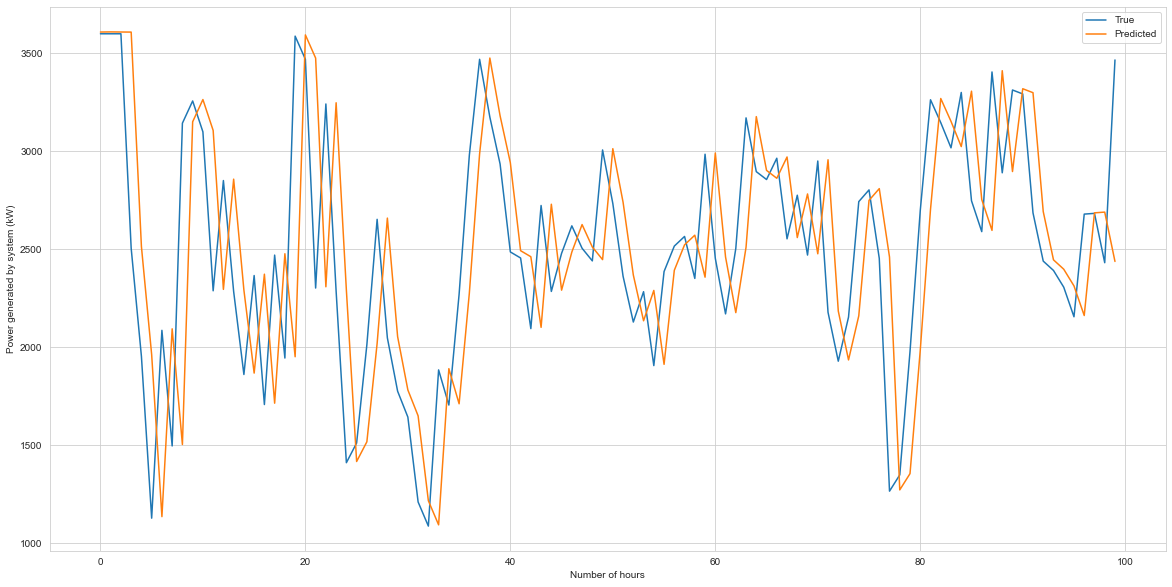

In [44]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(expectations_plot[0:100], label="True")
plt.plot(predictions_plot[0:100], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("Number of hours")
plt.ylabel("Power generated by system (kW)")
plt.show()

In [39]:
lstm_model.save('lstm_model.h5')